# EDA_Viz_Cleaning Project 2

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv('./datasets/train.csv') # reading in data as csv
pd.set_option('max_columns', 210) # expanding view of data for analysis
pd.set_option('max_rows', 210)

In [4]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [5]:
train.columns = train.columns.str.replace(' ', '').str.lower() # lowering & filling space of my columns. Normally I would snake case but the test set columns are already joined together

In [6]:
train.head()

,id,pid,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremod/add,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [7]:
# Define function to create initial EDA DataFrame using Meggan's code and some modification 
def eda(df):
    data_frame = pd.DataFrame({'null_sum': df.isnull().sum(), 'null_percent': df.isnull().mean(),
                        'dtypes': df.dtypes, 'count': df.count(), 
                        'mean': df.mean(), 'median': df.median(),
                        'min': df.min(), 'max': df.max(), 'std': df.std()})
    print(df.shape)
    return data_frame
eda(train)

(2051, 81)


,null_sum,null_percent,dtypes,count,mean,median,min,max,std
1stflrsf,0,0.000000,int64,2051,1.164488e+03,1093.0,334,5095,3.964469e+02
2ndflrsf,0,0.000000,int64,2051,3.293291e+02,0.0,0,1862,4.256710e+02
3ssnporch,0,0.000000,int64,2051,2.591419e+00,0.0,0,508,2.522961e+01
alley,1911,0.931741,object,140,NaN,NaN,NaN,NaN,NaN
bedroomabvgr,0,0.000000,int64,2051,2.843491e+00,3.0,0,8,8.266183e-01
bldgtype,0,0.000000,object,2051,NaN,NaN,1Fam,TwnhsE,NaN
bsmtcond,55,0.026816,object,1996,NaN,NaN,NaN,NaN,NaN
bsmtexposure,58,0.028279,object,1993,NaN,NaN,NaN,NaN,NaN
bsmtfinsf1,1,0.000488,float64,2050,4.423005e+02,368.0,0,5644,4.612041e+02
bsmtfinsf2,1,0.000488,float64,2050,4.795902e+01,0.0,0,1474,1.650009e+02


In [8]:
# Begin by finding the correlating numerical features
train.corrwith(train['saleprice']).sort_values(ascending=False)

saleprice        1.000000
overallqual      0.800207
grlivarea        0.697038
garagearea       0.650270
garagecars       0.648220
totalbsmtsf      0.628925
1stflrsf         0.618486
yearbuilt        0.571849
yearremod/add    0.550370
fullbath         0.537969
garageyrblt      0.533922
masvnrarea       0.512230
totrmsabvgrd     0.504014
fireplaces       0.471093
bsmtfinsf1       0.423519
lotfrontage      0.341842
openporchsf      0.333476
wooddecksf       0.326490
lotarea          0.296566
bsmtfullbath     0.283662
halfbath         0.283001
2ndflrsf         0.248452
bsmtunfsf        0.190210
bedroomabvgr     0.137067
screenporch      0.134581
3ssnporch        0.048732
mosold           0.032735
poolarea         0.023106
bsmtfinsf2       0.016255
miscval         -0.007375
yrsold          -0.015203
lowqualfinsf    -0.041594
bsmthalfbath    -0.045328
id              -0.051398
mssubclass      -0.087335
overallcond     -0.097019
kitchenabvgr    -0.125444
enclosedporch   -0.135656
pid         

In [9]:
# Dropping low correaltions (above -.5 and below .5)), high null values over 1000 & unnecessary columns
train = train.drop(['pid',
                    'bsmthalfbath',
                    'lowqualfinsf',
                    'bsmtfinsf2',
                    'poolarea',
                    'mosold',
                    '3ssnporch',
                    'alley',
                    'fireplacequ',
                    'poolqc',
                    'fence',
                    'miscfeature',
                    'miscval',
                    'yrsold',
                   'bsmtfinsf2',
                   'overallcond'],
                   axis=1)

In [10]:
train['grlivarea'].sort_values(ascending=False).head() # OUTLIERS

960     5642
1885    5095
616     3820
1897    3672
1035    3608
Name: grlivarea, dtype: int64

In [11]:
train.loc[[960, 1885, 616, 1897, 1035], ['grlivarea', 'saleprice']]

,grlivarea,saleprice
960,5642,160000
1885,5095,183850
616,3820,284700
1897,3672,415000
1035,3608,475000


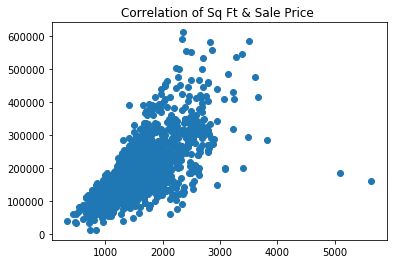

In [12]:
plt.scatter(train['grlivarea'], train['saleprice']); # visual of outliers
plt.title("Correlation of Sq Ft & Sale Price ");

In [13]:
train['lotarea'].sort_values(ascending=False).head(20) # OUTLIERS

471     159000
694     115149
1854     70761
960      63887
745      57200
823      53504
1052     53227
1843     53107
1964     51974
1571     50271
1726     50102
1167     47280
616      47007
1542     46589
1875     43500
441      41600
108      39384
1885     39290
841      39104
24       34650
Name: lotarea, dtype: int64

In [14]:
train.loc[[471, 694]]

,id,mssubclass,mszoning,lotfrontage,lotarea,street,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,yearbuilt,yearremod/add,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,grlivarea,bsmtfullbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,screenporch,saletype,saleprice
471,2116,50,RL,NaN,159000,Pave,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1.5Fin,6,1958,2006,Gable,CompShg,Wd Sdng,HdBoard,BrkCmn,472.0,Gd,TA,CBlock,Gd,TA,Gd,Rec,697.0,Unf,747.0,1444.0,GasA,Gd,Y,SBrkr,1444,700,2144,0.0,2,0,4,1,Gd,7,Typ,2,Attchd,1958.0,Fin,2.0,389.0,TA,TA,Y,0,98,0,0,WD,277000
694,2072,20,RL,NaN,115149,Pave,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1Story,7,1971,2002,Gable,CompShg,Plywood,Plywood,Stone,351.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,1219.0,Unf,424.0,1643.0,GasA,TA,Y,SBrkr,1824,0,1824,1.0,2,0,2,1,Gd,5,Typ,2,Attchd,1971.0,Unf,2.0,739.0,TA,TA,Y,380,48,0,0,WD,302000


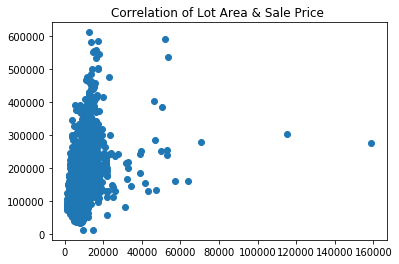

In [15]:
plt.scatter(train['lotarea'], train['saleprice']); # great visual of outliers
plt.title("Correlation of Lot Area & Sale Price ");

In [16]:
train = train.drop([471, 694, 960, 1854, 1885], axis=0)

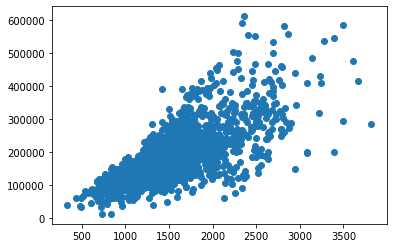

In [17]:
plt.scatter(train['grlivarea'], train['saleprice']); # Checking new version without outliers

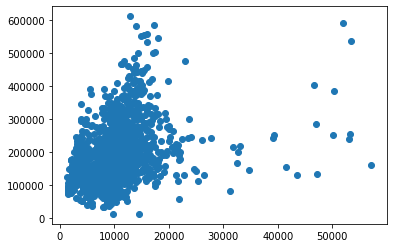

In [18]:
plt.scatter(train['lotarea'], train['saleprice']); # Checking new version without outliers

**Mapping the Ordinals**

In [19]:
mapping_ordinals = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0} # Setting up desired integer values for strings

train = train.replace(mapping_ordinals) # Replacing the rows with my wanted values

train.loc[:, ['exterqual', 'extercond', 'bsmtcond', 'bsmtqual', 'heatingqc', 'kitchenqual',
'garagequal', 'garagecond']] = train.loc[:, ['exterqual', 'extercond', 'bsmtcond', 'bsmtqual', 'heatingqc', 'kitchenqual',
'garagequal', 'garagecond']].astype(float) # changing dtypes to floats

### Handling Null Data by Filling with the Average/Mean

In [20]:
train = train.fillna(train.mean()) # filling whatever nulls there are with the mean of that column.

**Interactions Experimentation**

In [21]:
print(train[["bedroomabvgr","fullbath"]].corr())
print(train[["halfbath","fullbath"]].corr())
print(train[["bedroomabvgr","halfbath"]].corr())

              bedroomabvgr  fullbath
bedroomabvgr      1.000000  0.345359
fullbath          0.345359  1.000000
          halfbath  fullbath
halfbath  1.000000  0.153838
fullbath  0.153838  1.000000
              bedroomabvgr  halfbath
bedroomabvgr      1.000000  0.231806
halfbath          0.231806  1.000000


In [22]:
print(train[["garagecars","garagearea"]].corr()) # high correlation so I'll engineer a feature next

            garagecars  garagearea
garagecars    1.000000    0.897344
garagearea    0.897344    1.000000


In [23]:
train['garagesize'] = train['garagearea'] * train['garagecars']

### Feature Engineering for Year Built

In [24]:
# engineering an age variable for the house based on the year it was built.
train['houseage'] = 2020 - train['yearbuilt']

In [25]:
train.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,yearbuilt,yearremod/add,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,grlivarea,bsmtfullbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,screenporch,saletype,saleprice,garagesize,houseage
0,109,60,RL,68.883003,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,4.0,3.0,CBlock,3.0,3.0,No,GLQ,533.0,Unf,192.0,725.0,GasA,5.0,Y,SBrkr,725,754,1479,0.0,2,1,3,1,4.0,6,Typ,0,Attchd,1976.0,RFn,2.0,475.0,3.0,3.0,Y,0,44,0,0,WD,130500,950.0,44
1,544,60,RL,43.000000,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,4.0,3.0,PConc,4.0,3.0,No,GLQ,637.0,Unf,276.0,913.0,GasA,5.0,Y,SBrkr,913,1209,2122,1.0,2,1,4,1,4.0,8,Typ,1,Attchd,1997.0,RFn,2.0,559.0,3.0,3.0,Y,0,74,0,0,WD,220000,1118.0,24
2,153,20,RL,68.000000,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3.0,4.0,CBlock,3.0,3.0,No,GLQ,731.0,Unf,326.0,1057.0,GasA,3.0,Y,SBrkr,1057,0,1057,1.0,1,0,3,1,4.0,5,Typ,0,Detchd,1953.0,Unf,1.0,246.0,3.0,3.0,Y,0,52,0,0,WD,109000,246.0,67
3,318,60,RL,73.000000,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3.0,3.0,PConc,4.0,3.0,No,Unf,0.0,Unf,384.0,384.0,GasA,4.0,Y,SBrkr,744,700,1444,0.0,2,1,3,1,3.0,7,Typ,0,BuiltIn,2007.0,Fin,2.0,400.0,3.0,3.0,Y,100,0,0,0,WD,174000,800.0,14
4,255,50,RL,82.000000,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,3.0,3.0,PConc,2.0,4.0,No,Unf,0.0,Unf,676.0,676.0,GasA,3.0,Y,SBrkr,831,614,1445,0.0,2,0,3,1,3.0,6,Typ,0,Detchd,1957.0,Unf,2.0,484.0,3.0,3.0,N,0,59,0,0,WD,138500,968.0,120


In [26]:
# Dropping features used for interaction & engineering to avoid feature-to-feature correlation. Also dropping more low correaltion features
train = train.drop(['garagearea', 'garagecars', 'yearbuilt', 'yearremod/add',
              'extercond', 'mssubclass'], axis=1)

# Exploring highest correlated features/columns and rechecking correlation

In [27]:
train.corrwith(train['saleprice']).sort_values(ascending=False)

saleprice        1.000000
overallqual      0.803859
grlivarea        0.719456
exterqual        0.716659
garagesize       0.694465
kitchenqual      0.694052
bsmtqual         0.668616
totalbsmtsf      0.663810
1stflrsf         0.647480
fullbath         0.537662
garageyrblt      0.518862
masvnrarea       0.515885
totrmsabvgrd     0.511702
fireplaces       0.471796
heatingqc        0.461280
bsmtfinsf1       0.444600
lotarea          0.357008
lotfrontage      0.339552
openporchsf      0.338509
wooddecksf       0.326814
halfbath         0.285291
bsmtfullbath     0.284108
2ndflrsf         0.249800
garagequal       0.203176
bsmtunfsf        0.190014
bsmtcond         0.173668
garagecond       0.148067
bedroomabvgr     0.138015
screenporch      0.135298
id              -0.053436
kitchenabvgr    -0.125242
enclosedporch   -0.135170
houseage        -0.573396
dtype: float64

## Heatmap to Visualize Correlations

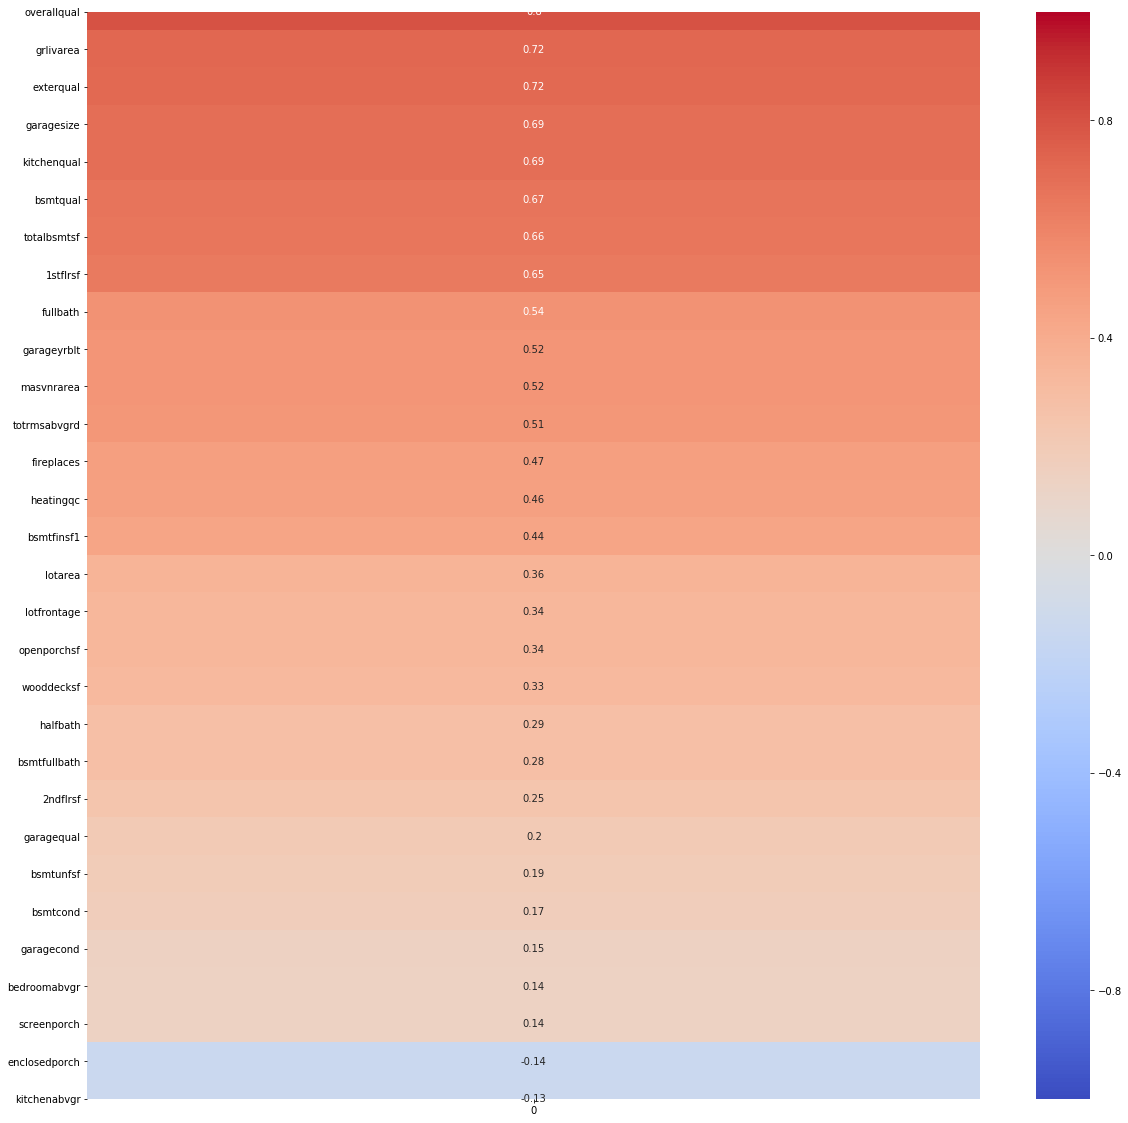

In [28]:
correlations = train.corrwith(train['saleprice']).iloc[:-1].to_frame()
correlations['abs'] = correlations[0].abs()
sorted_corrs = correlations.sort_values('abs', ascending=False)[0]
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(sorted_corrs[1:-1].to_frame(), \
           cmap='coolwarm', annot=True, vmin=-1, vmax=1, ax=ax);
# calculating coorelations with heatmap
plt.savefig('Total Heatmap.png')

In [29]:
features_testing_1 = ['overallqual', 'exterqual', 'gr_livarea', 'kitchenqual', 'garagesize'] # isolating top 5 correlating features

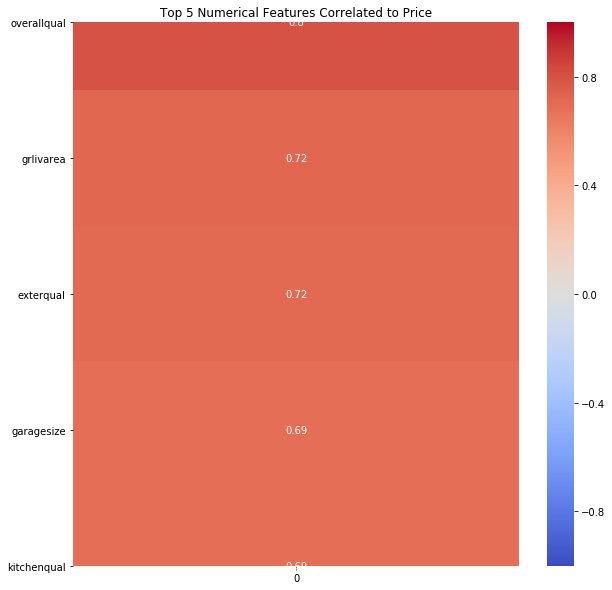

In [30]:
correlations = train.corrwith(train['saleprice']).iloc[:-1].to_frame()
correlations['abs'] = correlations[0].abs()
sorted_corrs = correlations.sort_values('abs', ascending=False)[0]
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_title('Top 5 Numerical Features Correlated to Price')
sns.heatmap(sorted_corrs[1:6].to_frame(), \
           cmap='coolwarm', annot=True, vmin=-1, vmax=1, ax=ax);
plt.yticks(rotation=0); 
plt.savefig('Top 5 Heatmap.png', bbox_inches='tight')

Text(0.5, 1.0, 'Correlation of Overall Quality & Sale Price ')

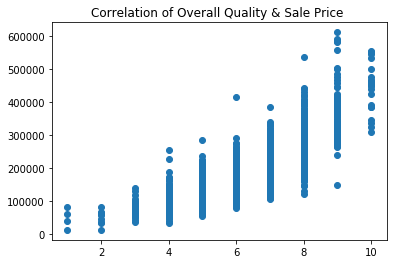

In [31]:
plt.scatter(train['overallqual'], train['saleprice']); # Exploring the feature Visually
plt.title("Correlation of Overall Quality & Sale Price ")

Text(0.5, 1.0, 'Correlation of Exterior Quality & Sale Price ')

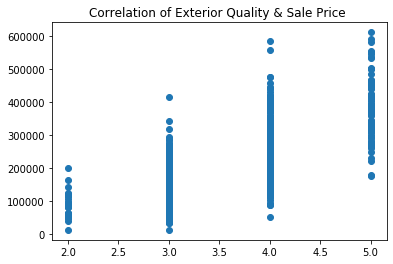

In [32]:
plt.scatter(train['exterqual'], train['saleprice'], ); # Exploring the feature Visually
plt.title("Correlation of Exterior Quality & Sale Price ")

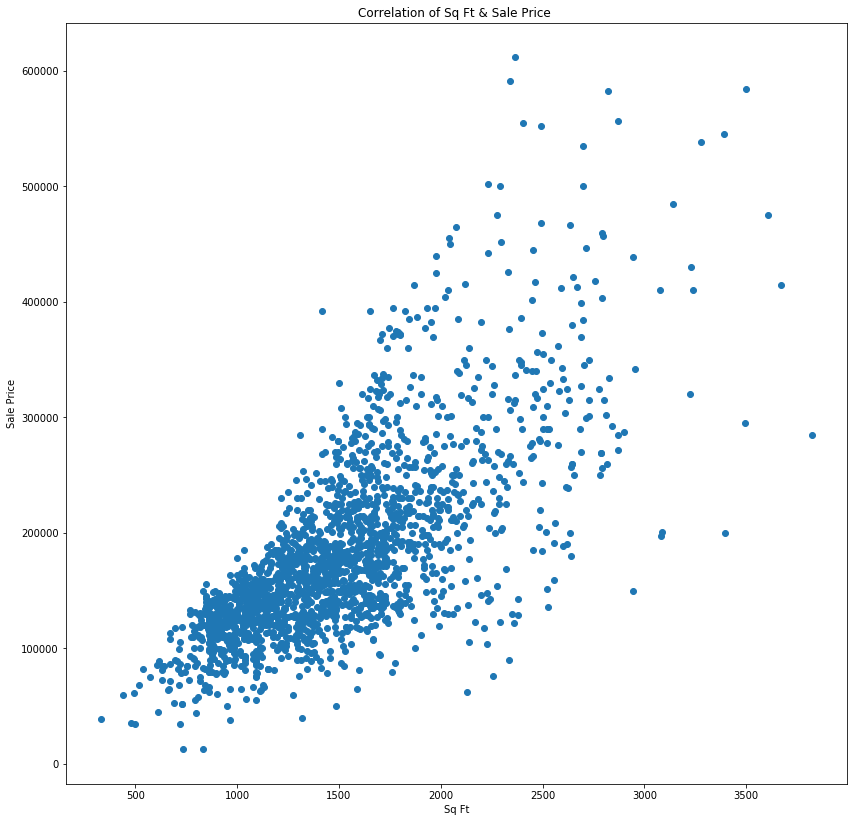

In [33]:
plt.figure(figsize=(14,14))
plt.scatter(train['grlivarea'], train['saleprice'])
plt.title("Correlation of Sq Ft & Sale Price ")
plt.xlabel("Sq Ft")
plt.ylabel("Sale Price"); # Exploring the feature Visually

Text(0.5, 1.0, 'Correlation of Kitchen Quality & Sale Price ')

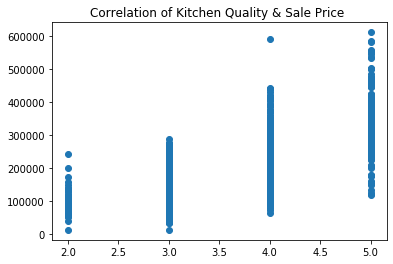

In [34]:
plt.scatter(train['kitchenqual'], train['saleprice']); # Exploring the feature Visually
plt.title("Correlation of Kitchen Quality & Sale Price ")

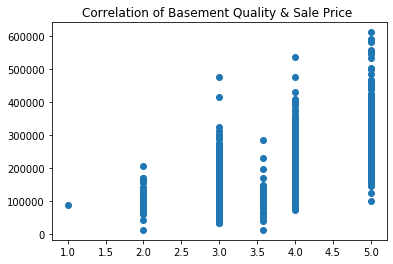

In [35]:
plt.scatter(train['bsmtqual'], train['saleprice']); # Exploring the feature Visually
plt.title("Correlation of Basement Quality & Sale Price ");

925     5920.0
337     5424.0
1293    5256.0
332     4600.0
1875    4164.0
613     4068.0
1158    4044.0
194     3872.0
1557    3693.0
1166    3680.0
Name: garagesize, dtype: float64

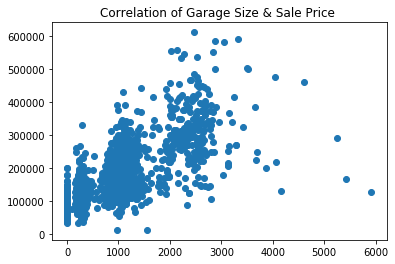

In [36]:
plt.scatter(train['garagesize'], train['saleprice']); # Exploring the feature Visually
plt.title("Correlation of Garage Size & Sale Price "); # Found another potential outlier or 2
train['garagesize'].sort_values(ascending=False).head(10) # Found a few outliers (925, 337, 1293)

In [37]:
train = train.drop([337, 925, 1293], axis=0) # dropping Garage Size outliers

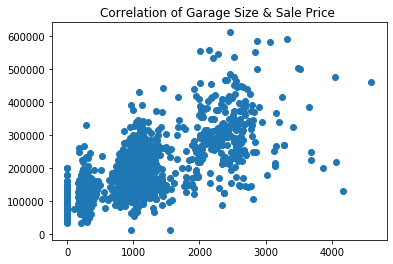

In [38]:
plt.scatter(train['garagesize'], train['saleprice']); # Check the new Visual
plt.title("Correlation of Garage Size & Sale Price ");

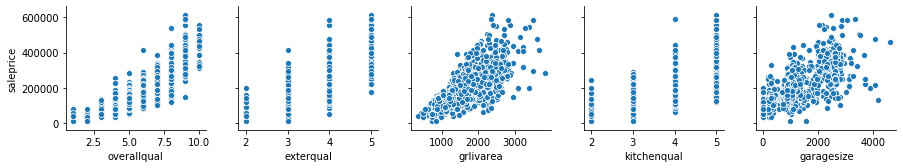

In [39]:
sns.pairplot(train, x_vars=['overallqual', 'exterqual', 'grlivarea',
                            'kitchenqual', 'garagesize'],
y_vars=['saleprice']);
# Exploring the features Visually all at once

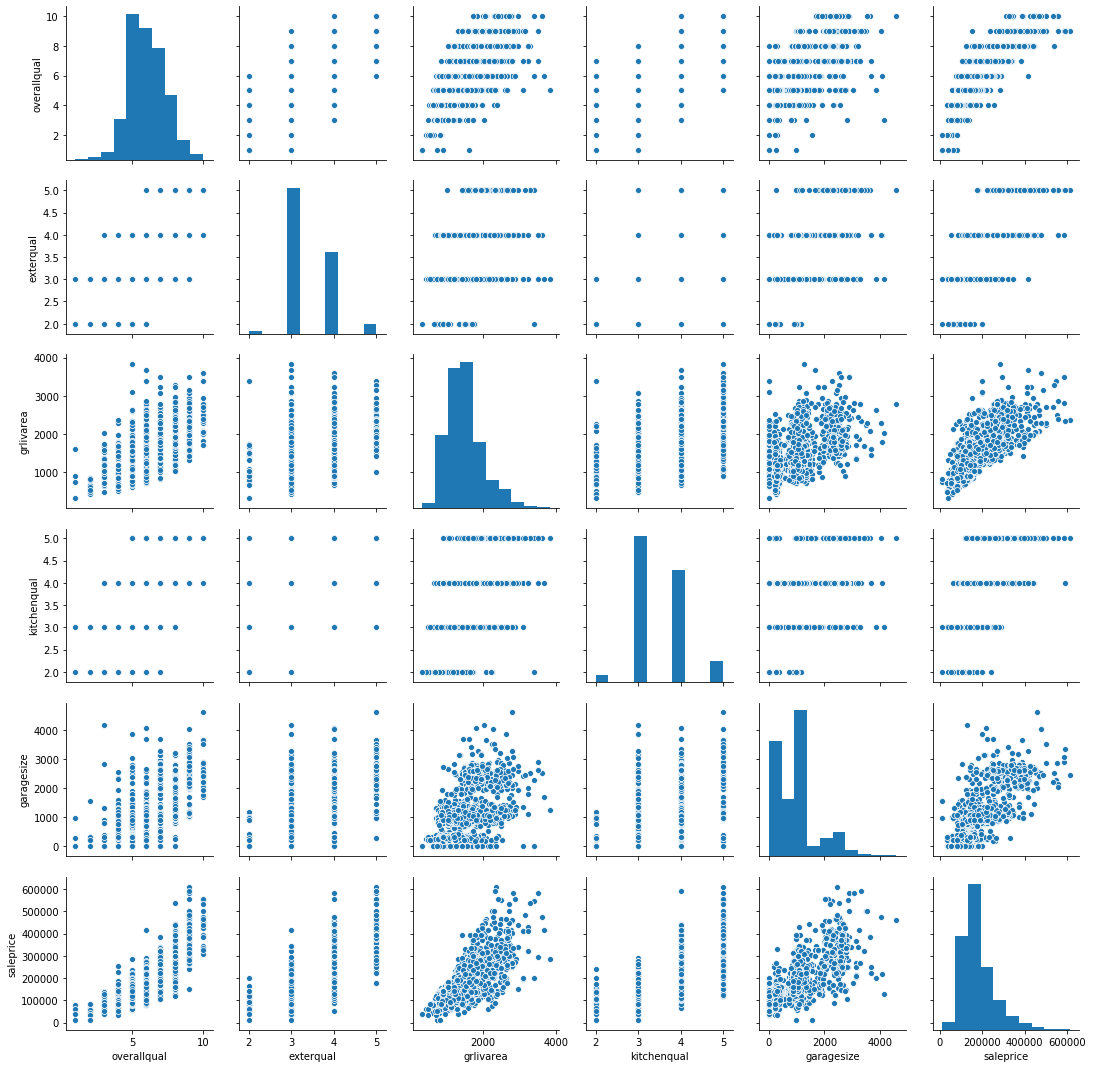

In [40]:
features_testing_1 = ['overallqual', 'exterqual', 'grlivarea', 'kitchenqual', 'garagesize'] # top 5 features
X = train[features_testing_1]   # Creates data frame
y = train['saleprice']
all_features_testing_1_cols = pd.concat([X,y.to_frame()], axis=1)
sns.pairplot(all_features_testing_1_cols);

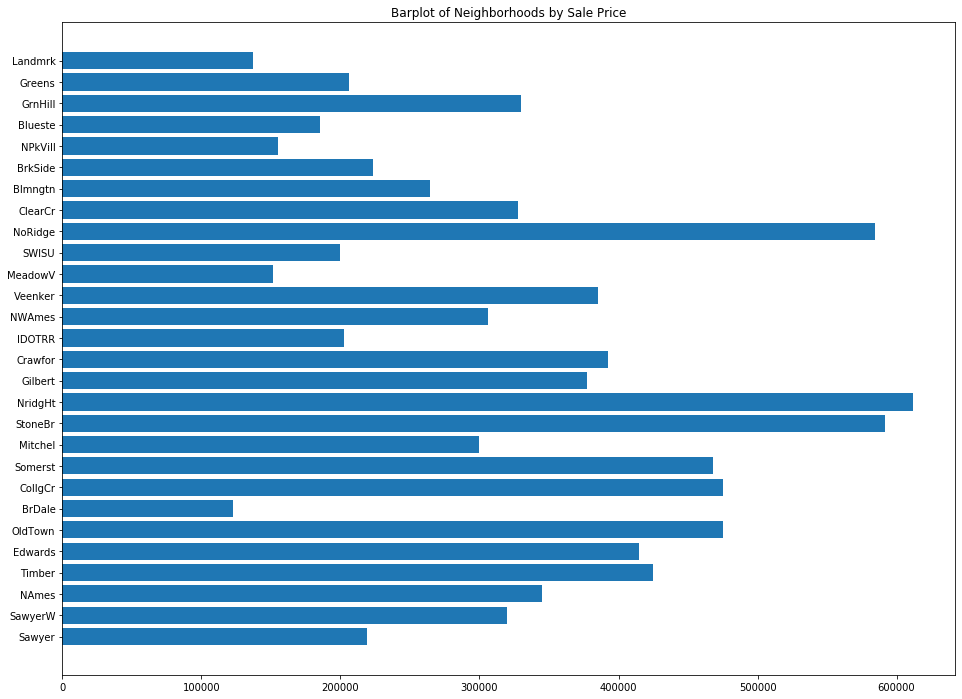

In [41]:
# Neighborhood & Sale Price visualization
fig, ax = plt.subplots(figsize=(16, 12))
ax.set_title('Barplot of Neighborhoods by Sale Price')

plt.barh(train['neighborhood'], train['saleprice']);
plt.savefig('Neighborhood & Sale Price Visualization.png')

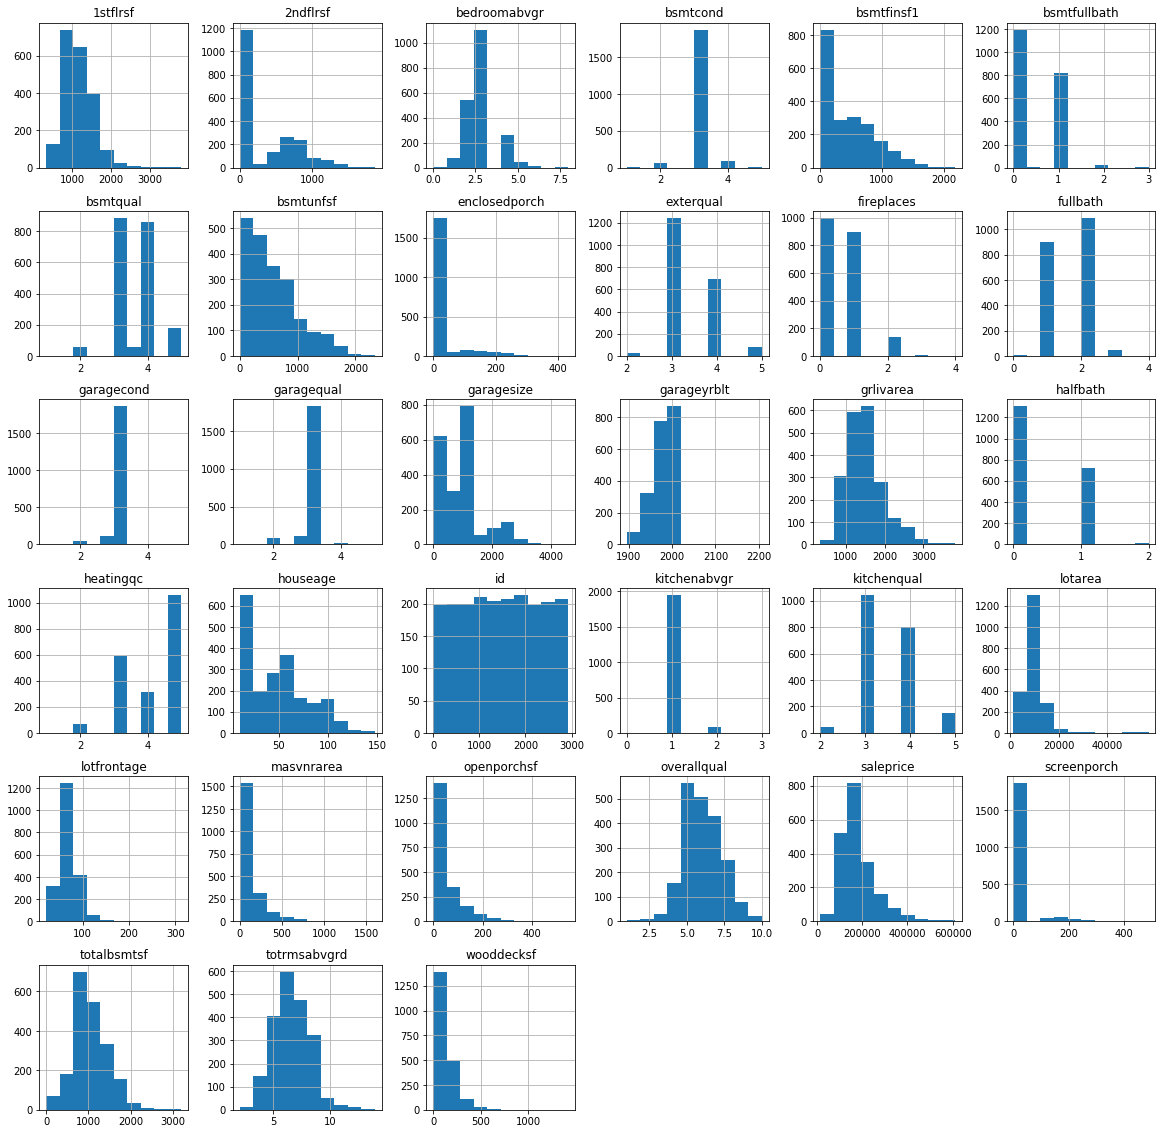

In [42]:
train.hist(figsize= (20, 20));

In [43]:
train_cleaned_to_model = train

In [44]:
train_cleaned_to_model

,id,mszoning,lotfrontage,lotarea,street,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,grlivarea,bsmtfullbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,garagetype,garageyrblt,garagefinish,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,screenporch,saletype,saleprice,garagesize,houseage
0,109,RL,68.883003,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,4.0,CBlock,3.0,3.0,No,GLQ,533.0,Unf,192.0,725.0,GasA,5.0,Y,SBrkr,725,754,1479,0.0,2,1,3,1,4.0,6,Typ,0,Attchd,1976.0,RFn,3.0,3.0,Y,0,44,0,0,WD,130500,950.0,44
1,544,RL,43.000000,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,4.0,PConc,4.0,3.0,No,GLQ,637.0,Unf,276.0,913.0,GasA,5.0,Y,SBrkr,913,1209,2122,1.0,2,1,4,1,4.0,8,Typ,1,Attchd,1997.0,RFn,3.0,3.0,Y,0,74,0,0,WD,220000,1118.0,24
2,153,RL,68.000000,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,Gable,CompShg,VinylSd,VinylSd,None,0.0,3.0,CBlock,3.0,3.0,No,GLQ,731.0,Unf,326.0,1057.0,GasA,3.0,Y,SBrkr,1057,0,1057,1.0,1,0,3,1,4.0,5,Typ,0,Detchd,1953.0,Unf,3.0,3.0,Y,0,52,0,0,WD,109000,246.0,67
3,318,RL,73.000000,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,Gable,CompShg,VinylSd,VinylSd,None,0.0,3.0,PConc,4.0,3.0,No,Unf,0.0,Unf,384.0,384.0,GasA,4.0,Y,SBrkr,744,700,1444,0.0,2,1,3,1,3.0,7,Typ,0,BuiltIn,2007.0,Fin,3.0,3.0,Y,100,0,0,0,WD,174000,800.0,14
4,255,RL,82.000000,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,Gable,CompShg,Wd Sdng,Plywood,None,0.0,3.0,PConc,2.0,4.0,No,Unf,0.0,Unf,676.0,676.0,GasA,3.0,Y,SBrkr,831,614,1445,0.0,2,0,3,1,3.0,6,Typ,0,Detchd,1957.0,Unf,3.0,3.0,N,0,59,0,0,WD,138500,968.0,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,RL,79.000000,11449,Pave,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,Gable,CompShg,VinylSd,VinylSd,None,0.0,4.0,PConc,4.0,3.0,Av,GLQ,1011.0,Unf,873.0,1884.0,GasA,5.0,Y,SBrkr,1728,0,1728,1.0,2,0,3,1,4.0,7,Typ,1,Attchd,2007.0,Fin,3.0,3.0,Y,0,276,0,0,WD,298751,1040.0,13
2047,785,RL,68.883003,12342,Pave,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,Gable,CompShg,VinylSd,VinylSd,None,0.0,3.0,CBlock,3.0,3.0,No,BLQ,262.0,Unf,599.0,861.0,GasA,5.0,Y,SBrkr,861,0,861,0.0,1,0,1,1,3.0,4,Typ,0,Detchd,1961.0,Unf,3.0,3.0,Y,158,0,0,0,WD,82500,1078.0,80
2048,916,RL,57.000000,7558,Pave,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1.5Fin,6,Gable,CompShg,BrkFace,Stone,None,0.0,3.0,BrkTil,3.0,3.0,No,Unf,0.0,Unf,896.0,896.0,GasA,4.0,Y,SBrkr,1172,741,1913,0.0,1,1,3,1,3.0,9,Typ,1,Detchd,1929.0,Unf,2.0,2.0,Y,0,0,0,0,WD,177000,684.0,92
2049,639,RL,80.000000,10400,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,Gable,CompShg,Plywood,Plywood,None,0.0,3.0,CBlock,3.0,3.0,No,Rec,155.0,LwQ,295.0,1200.0,GasA,3.0,Y,SBrkr,1200,0,1200,1.0,1,0,3,1,3.0,6,Typ,2,Attchd,1956.0,Unf,3.0,3.0,Y,0,189,140,0,WD,144000,294.0,64


In [45]:
train_cleaned_to_model.to_csv('./train_cleaned.csv', index=False) # saving my cleaned data to csv in other folder

In [46]:
# Read in test data to clean the same way I cleaned training data
test = pd.read_csv('./datasets/test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [47]:
test.columns = test.columns.str.lower() # the test set columns don't have spaces like train set so I only need to lower here

In [48]:
columns_to_drop = ['yrsold', 'bsmtfinsf2', 'miscfeature', 'bsmthalfbath','lowqualfinsf', 'mosold','3ssnporch','alley', 'fireplacequ','poolqc','fence','bsmtfinsf2', 'overallcond','poolarea','miscval']
test = test.drop(columns_to_drop, axis=1)

In [49]:
mapping_ordinals = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
test = test.replace(mapping_ordinals) # I then replace the rows with my wanted values
test.loc[:, ['exterqual', 'extercond', 'bsmtcond', 'heatingqc', 'kitchenqual',
'garagequal', 'garagecond']] = test.loc[:, ['exterqual', 'extercond', 'bsmtcond', 'heatingqc', 'kitchenqual',
'garagequal', 'garagecond']].astype(float) # changing dtypes to floats
test = test.fillna(test.mean())
test['garagesize'] = test['garagearea'] * test['garagecars']
test['houseage'] = 2020 - test['yearbuilt']
test = test.drop(['garagearea', 'garagecars', 'yearbuilt', 'yearremodadd',
              'extercond', 'mssubclass'], axis=1)

In [50]:
(train.columns.difference(test.columns)) # Making sure the only difference is saleprice

Index(['saleprice'], dtype='object')

In [59]:
train_cleaned_to_model

,id,mszoning,lotfrontage,lotarea,street,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,grlivarea,bsmtfullbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,garagetype,garageyrblt,garagefinish,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,screenporch,saletype,saleprice,garagesize,houseage
0,109,RL,68.883003,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,4.0,CBlock,3.0,3.0,No,GLQ,533.0,Unf,192.0,725.0,GasA,5.0,Y,SBrkr,725,754,1479,0.0,2,1,3,1,4.0,6,Typ,0,Attchd,1976.0,RFn,3.0,3.0,Y,0,44,0,0,WD,130500,950.0,44
1,544,RL,43.000000,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,4.0,PConc,4.0,3.0,No,GLQ,637.0,Unf,276.0,913.0,GasA,5.0,Y,SBrkr,913,1209,2122,1.0,2,1,4,1,4.0,8,Typ,1,Attchd,1997.0,RFn,3.0,3.0,Y,0,74,0,0,WD,220000,1118.0,24
2,153,RL,68.000000,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,Gable,CompShg,VinylSd,VinylSd,None,0.0,3.0,CBlock,3.0,3.0,No,GLQ,731.0,Unf,326.0,1057.0,GasA,3.0,Y,SBrkr,1057,0,1057,1.0,1,0,3,1,4.0,5,Typ,0,Detchd,1953.0,Unf,3.0,3.0,Y,0,52,0,0,WD,109000,246.0,67
3,318,RL,73.000000,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,Gable,CompShg,VinylSd,VinylSd,None,0.0,3.0,PConc,4.0,3.0,No,Unf,0.0,Unf,384.0,384.0,GasA,4.0,Y,SBrkr,744,700,1444,0.0,2,1,3,1,3.0,7,Typ,0,BuiltIn,2007.0,Fin,3.0,3.0,Y,100,0,0,0,WD,174000,800.0,14
4,255,RL,82.000000,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,Gable,CompShg,Wd Sdng,Plywood,None,0.0,3.0,PConc,2.0,4.0,No,Unf,0.0,Unf,676.0,676.0,GasA,3.0,Y,SBrkr,831,614,1445,0.0,2,0,3,1,3.0,6,Typ,0,Detchd,1957.0,Unf,3.0,3.0,N,0,59,0,0,WD,138500,968.0,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,RL,79.000000,11449,Pave,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,Gable,CompShg,VinylSd,VinylSd,None,0.0,4.0,PConc,4.0,3.0,Av,GLQ,1011.0,Unf,873.0,1884.0,GasA,5.0,Y,SBrkr,1728,0,1728,1.0,2,0,3,1,4.0,7,Typ,1,Attchd,2007.0,Fin,3.0,3.0,Y,0,276,0,0,WD,298751,1040.0,13
2047,785,RL,68.883003,12342,Pave,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,Gable,CompShg,VinylSd,VinylSd,None,0.0,3.0,CBlock,3.0,3.0,No,BLQ,262.0,Unf,599.0,861.0,GasA,5.0,Y,SBrkr,861,0,861,0.0,1,0,1,1,3.0,4,Typ,0,Detchd,1961.0,Unf,3.0,3.0,Y,158,0,0,0,WD,82500,1078.0,80
2048,916,RL,57.000000,7558,Pave,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1.5Fin,6,Gable,CompShg,BrkFace,Stone,None,0.0,3.0,BrkTil,3.0,3.0,No,Unf,0.0,Unf,896.0,896.0,GasA,4.0,Y,SBrkr,1172,741,1913,0.0,1,1,3,1,3.0,9,Typ,1,Detchd,1929.0,Unf,2.0,2.0,Y,0,0,0,0,WD,177000,684.0,92
2049,639,RL,80.000000,10400,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,Gable,CompShg,Plywood,Plywood,None,0.0,3.0,CBlock,3.0,3.0,No,Rec,155.0,LwQ,295.0,1200.0,GasA,3.0,Y,SBrkr,1200,0,1200,1.0,1,0,3,1,3.0,6,Typ,2,Attchd,1956.0,Unf,3.0,3.0,Y,0,189,140,0,WD,144000,294.0,64


In [60]:
clean_test = test

In [61]:
clean_test

,id,mszoning,lotfrontage,lotarea,street,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,grlivarea,bsmtfullbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,garagetype,garageyrblt,garagefinish,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,screenporch,saletype,salecondition,garagesize,houseage
0,1461,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,Gable,CompShg,VinylSd,VinylSd,None,0.0,3.0,CBlock,3.0,3.0,No,Rec,468.0,LwQ,270.0,882.0,GasA,3.0,Y,SBrkr,896,0,896,0.0,1,0,2,1,3.0,5,Typ,0,Attchd,1961.000000,Unf,3.000000,3.000000,Y,140,0,0,120,WD,Normal,730.0,59
1,1462,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,3.0,CBlock,3.0,3.0,No,ALQ,923.0,Unf,406.0,1329.0,GasA,3.0,Y,SBrkr,1329,0,1329,0.0,1,1,3,1,4.0,6,Typ,0,Attchd,1958.000000,Unf,3.000000,3.000000,Y,393,36,0,0,WD,Normal,312.0,62
2,1463,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,Gable,CompShg,VinylSd,VinylSd,None,0.0,3.0,PConc,4.0,3.0,No,GLQ,791.0,Unf,137.0,928.0,GasA,4.0,Y,SBrkr,928,701,1629,0.0,2,1,3,1,3.0,6,Typ,1,Attchd,1997.000000,Fin,3.000000,3.000000,Y,212,34,0,0,WD,Normal,964.0,23
3,1464,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,3.0,PConc,3.0,3.0,No,GLQ,602.0,Unf,324.0,926.0,GasA,5.0,Y,SBrkr,926,678,1604,0.0,2,1,3,1,4.0,7,Typ,1,Attchd,1998.000000,Fin,3.000000,3.000000,Y,360,36,0,0,WD,Normal,940.0,22
4,1465,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,Gable,CompShg,HdBoard,HdBoard,None,0.0,4.0,PConc,4.0,3.0,No,ALQ,263.0,Unf,1017.0,1280.0,GasA,5.0,Y,SBrkr,1280,0,1280,0.0,2,0,2,1,4.0,5,Typ,0,Attchd,1992.000000,RFn,3.000000,3.000000,Y,0,82,0,144,WD,Normal,1012.0,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,Gable,CompShg,CemntBd,CmentBd,None,0.0,3.0,CBlock,3.0,3.0,No,Unf,0.0,Unf,546.0,546.0,GasA,4.0,Y,SBrkr,546,546,1092,0.0,1,1,3,1,3.0,5,Typ,0,NaN,1977.721217,NaN,2.949312,2.967415,Y,0,0,0,0,WD,Normal,0.0,50
1455,2916,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,Gable,CompShg,CemntBd,CmentBd,None,0.0,3.0,CBlock,3.0,3.0,No,Rec,252.0,Unf,294.0,546.0,GasA,3.0,Y,SBrkr,546,546,1092,0.0,1,1,3,1,3.0,6,Typ,0,CarPort,1970.000000,Unf,3.000000,3.000000,Y,0,24,0,0,WD,Abnorml,286.0,50
1456,2917,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,Gable,CompShg,VinylSd,VinylSd,None,0.0,3.0,CBlock,3.0,3.0,No,ALQ,1224.0,Unf,0.0,1224.0,GasA,5.0,Y,SBrkr,1224,0,1224,1.0,1,0,4,1,3.0,7,Typ,1,Detchd,1960.000000,Unf,3.000000,3.000000,Y,474,0,0,0,WD,Abnorml,1152.0,60
1457,2918,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,Gable,CompShg,HdBoard,Wd Shng,None,0.0,3.0,PConc,4.0,3.0,Av,GLQ,337.0,Unf,575.0,912.0,GasA,3.0,Y,SBrkr,970,0,970,0.0,1,0,3,1,3.0,6,Typ,0,NaN,1977.721217,NaN,2.949312,2.967415,Y,80,32,0,0,WD,Normal,0.0,28


In [54]:
(clean_test.columns.difference(train.columns)) # Making sure the only difference is saleprice. Found salecondition.

Index(['salecondition'], dtype='object')

In [57]:
clean_test = clean_test.drop('salecondition', axis=1) # dropping last different column

In [62]:
clean_test.to_csv('./test_cleaned.csv', index=False)